In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/My Drive/ann challenge

Mounted at /content/drive
/content/drive/My Drive/ann challenge


## Import libraries

In [ ]:
# Fix randomness and hide warnings
seed = 42

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['MPLCONFIGDIR'] = os.getcwd()+'/configs/'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

import numpy as np
np.random.seed(seed)

import logging

import random
random.seed(seed)

In [ ]:
# Import tensorflow
import tensorflow as tf
from tensorflow import keras as tfk
from tensorflow.keras import layers as tfkl
tf.autograph.set_verbosity(0)
tf.get_logger().setLevel(logging.ERROR)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
tf.random.set_seed(seed)
tf.compat.v1.set_random_seed(seed)
print(tf.__version__)

2.14.0


In [ ]:
# Import other libraries
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns

## Load data

In [ ]:
data = np.load('preprocessed_data.npz', allow_pickle=True)

In [ ]:
X_train, X_val, y_train, y_val = data["X_train"], data["X_val"], data["y_train"], data["y_val"]

In [ ]:
X_train, X_val = X_train / 255, X_val / 255

## Data Augmentation

In [ ]:
def plot_images(X, X_aug, num_img = 10):
    fig, axes = plt.subplots(2, num_img, figsize=(20,4))
    for i in range(num_img):
        ax = axes[0,i%num_img]
        ax.imshow(X[i])
        ax.axis('off')
        ax = axes[1,i%num_img]
        ax.imshow(X_aug[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

#### Random Flip

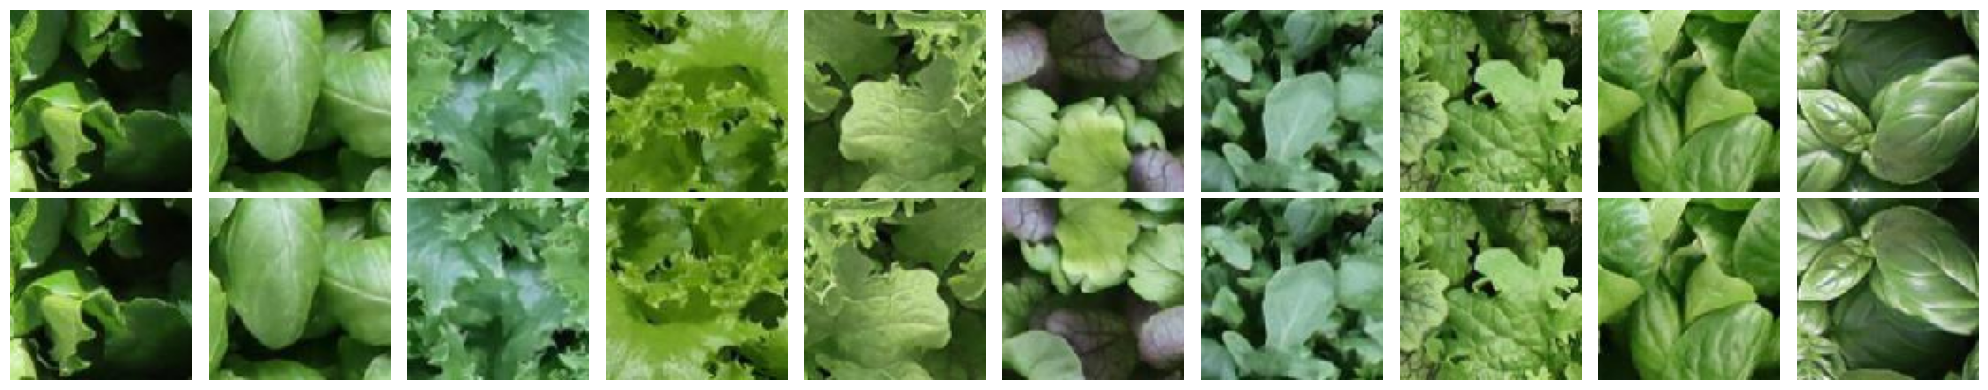

In [ ]:
random_flip = tfkl.RandomFlip("horizontal_and_vertical")
X_aug = random_flip((X_train))
plot_images(X_train, X_aug)

#### Random Translation

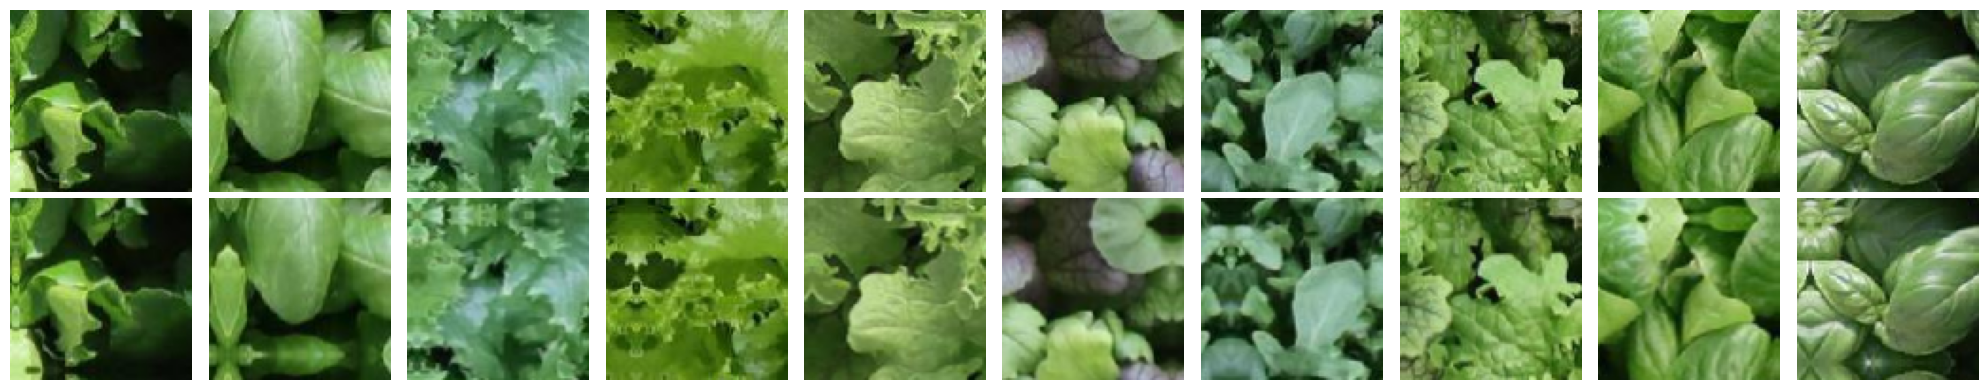

In [ ]:
random_translation = tfkl.RandomTranslation(0.2, 0.2, fill_mode='reflect')
X_aug = random_translation(X_train)
plot_images(X_train, X_aug)

#### Random Rotation

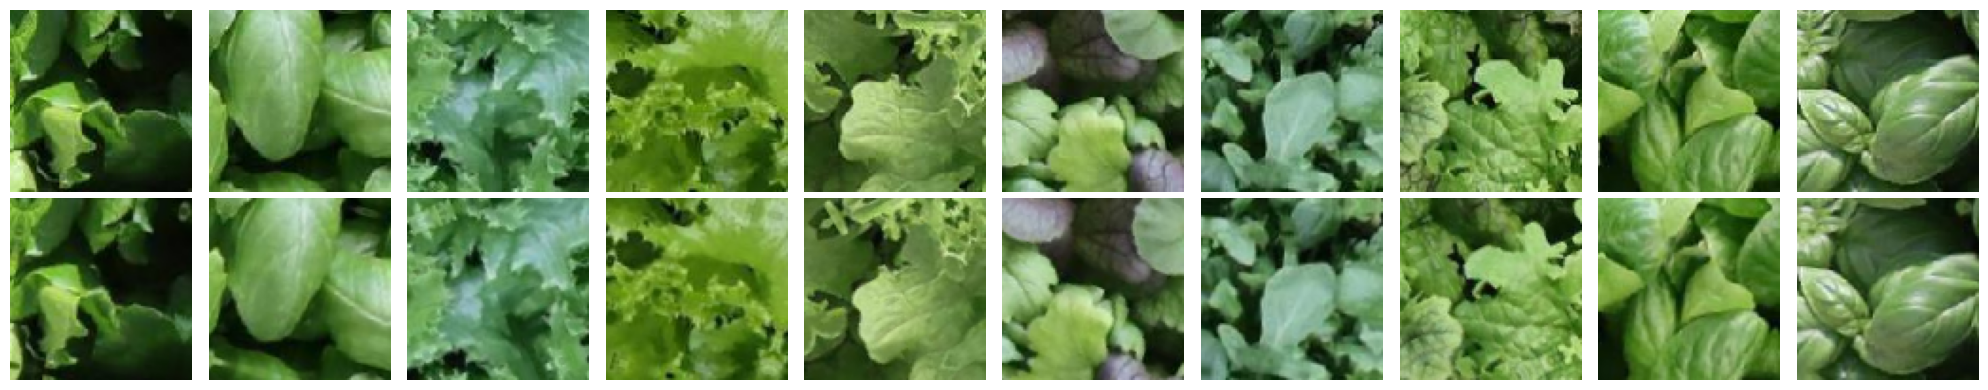

In [ ]:
random_rotation = tfkl.RandomRotation(0.1)
X_aug = random_rotation(X_train)
plot_images(X_train, X_aug)

#### Random Zoom

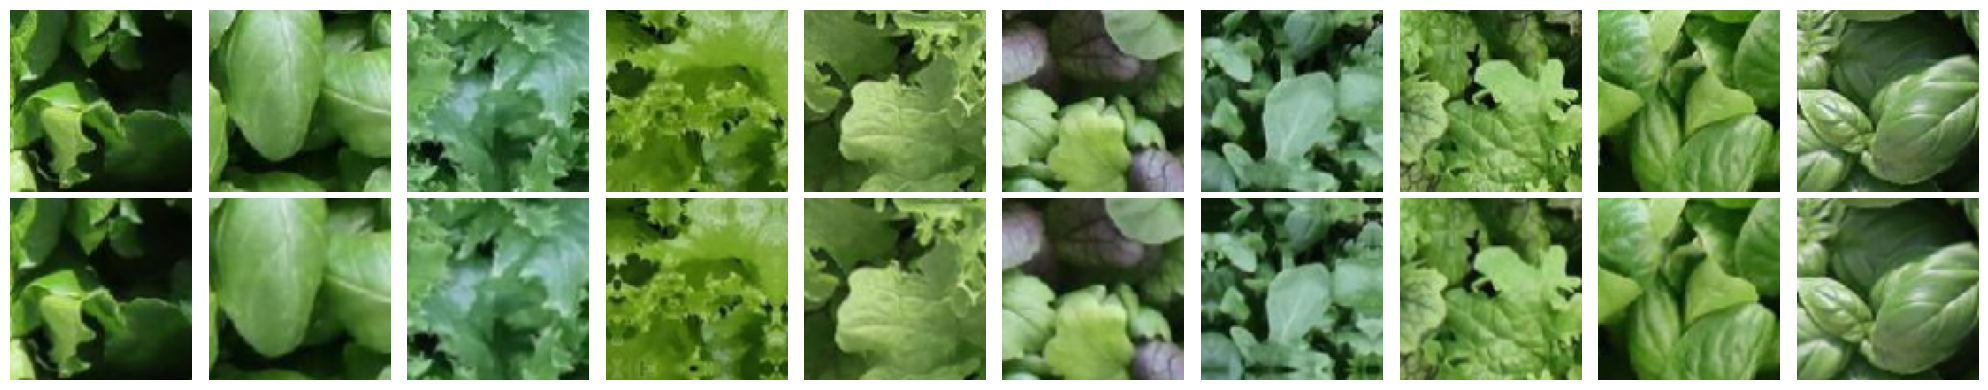

In [ ]:
random_zoom = tfkl.RandomZoom(0.2, fill_mode='reflect')
X_aug = random_zoom(X_train)
plot_images(X_train, X_aug)

## Random Contrast

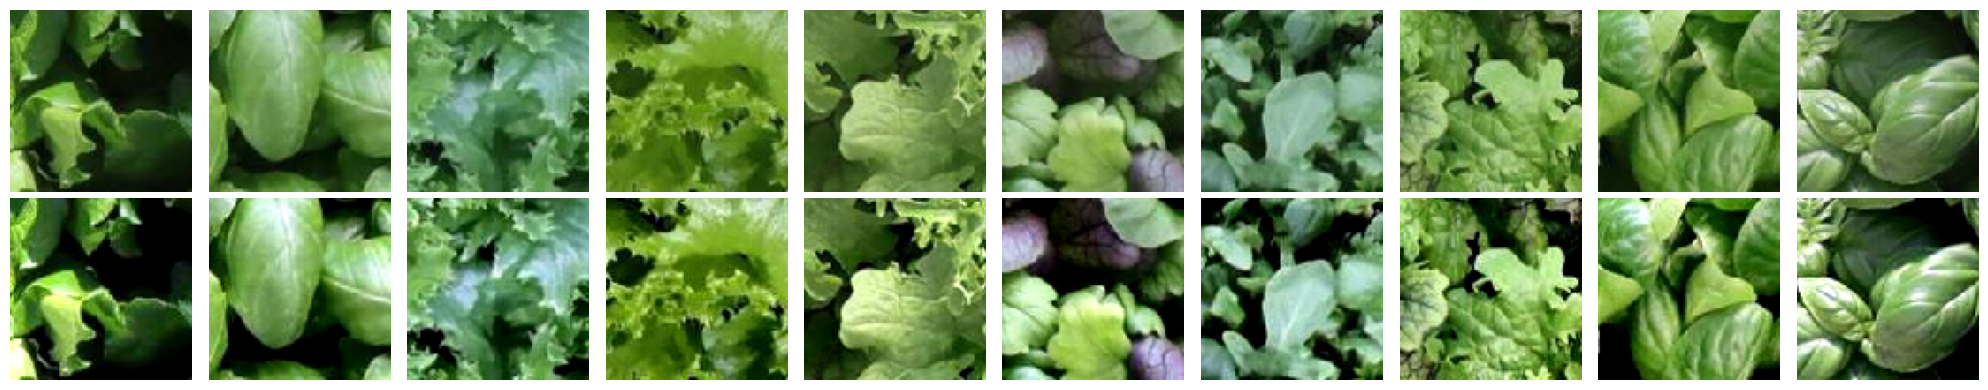

In [ ]:
random_contrast = tfkl.RandomContrast(0.5)
X_aug = random_contrast(X_train)
plot_images(X_train, X_aug)

## Random Brightness

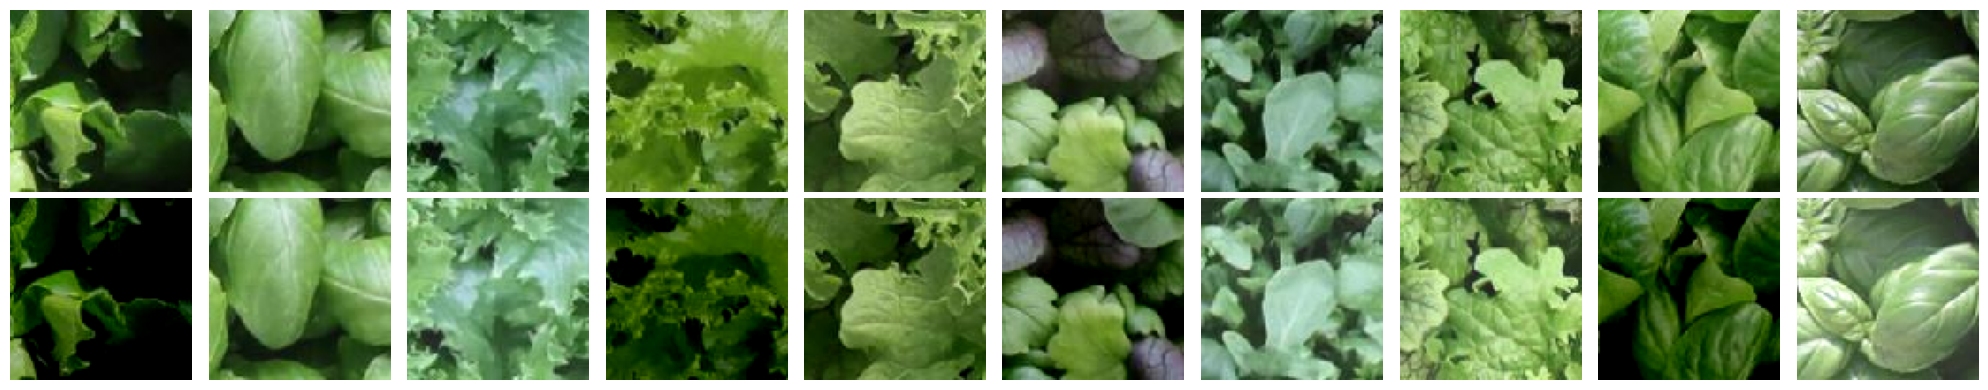

In [ ]:
random_brightness = tfkl.RandomBrightness(0.3, value_range=(0,1))
X_aug = random_brightness(X_train)
plot_images(X_train, X_aug)

## Augmentation Pipeline

In [ ]:
pipeline = tfk.Sequential([
    random_flip,
    random_translation,
    random_rotation,
    random_zoom,
    random_contrast,
    random_brightness
])

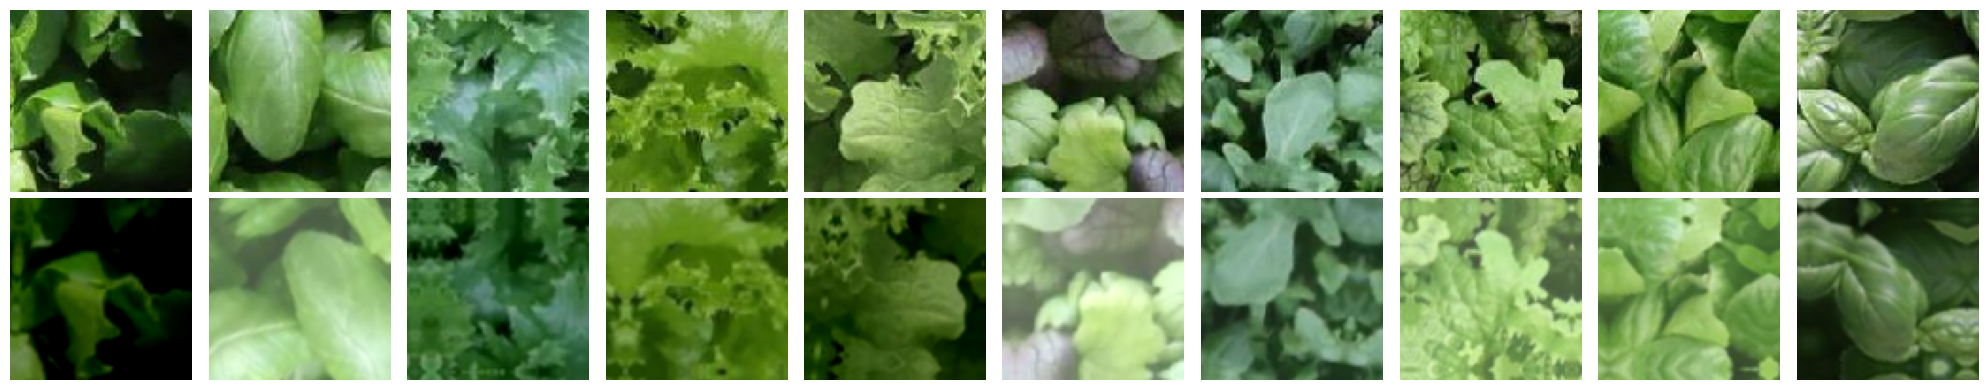

In [ ]:
X_aug = pipeline(X_train)
plot_images(X_train, X_aug)